In [2]:
using LinearAlgebra, Plots
gr()

Plots.GRBackend()

### Problem 1



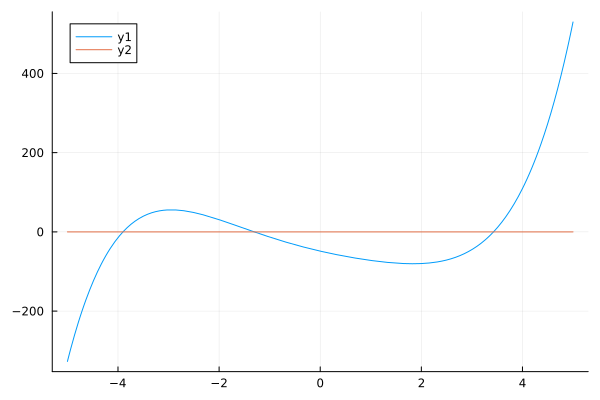

In [3]:
#f(x) is defined and plotted for you
f(x) = 0.2x.^5 - 0.4(x-5).^3 + 0.7(x +2) - 100
z(x) = 0
p = plot(f, -5, 5)
plot!(z, -5, 5)

Using the Bisection Algorithm, find the root of f(x) near x = -4.0



f(x) = 0.2x^5 - 0.4(x - 5)^3 + 0.7(x + 2) - 100



* Declare variables `a` and `b` such that a < b and f(a) \cdot f(b) < 0 (use the graph to help you find good values surrounding x = -4!)
* Declare variable `c` as the midpoint between `a` and `b`
* Build a `while` loop that performs the Bisection Algorithm using the given function, `f`.
* Your solution should be stored in a variable named `xRoot`
* At the end, output `[xRoot f(xRoot)]`
* Double-check that you are finding the root near x = -4


In [6]:
a = -5
b = -2
c = (a+b)/2
xRoot = 0
while true
  if abs(f(c)) < 1e-8
    xRoot = c
    break
  elseif f(c)*f(a) <0
    b = c
  else
    a = c
  end
  c = (a+b)/2
end


isItARoot = (abs(f(xRoot)) < 1e-8) ? "Yes" : "No"  
@show isItARoot;

#if "nothing" is output then nothing is wrong
@show @assert(isapprox(xRoot, -3.9015252757817507, atol=1e-4))

isItARoot = "Yes"
#= d:\CODING\Julia\Lab\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W6sZmlsZQ==.jl:22 =# @assert(isapprox(xRoot, -3.9015252757817507, atol = 0.0001)) = nothing


### Problem 2



Based on the algorithm in Problem 1, create a function named `my_bisect(f,a,b,aTol=1e-12)` that performs the bisection algorithm for any given function and starting values.



In [ ]:
#=
Code Skeleton
The error checks are completed for you.
It also includes some code that hints 
at keeping track of iterations
=#

function my\_bisect(f, a, b, aTol=1e-12)
 xRoot = NaN
 
 #error checks: done for you
 if !(a < b)
 println("a is not strictly less than b")
 return xRoot 
 end
 if !( f(a)\*f(b) < 0)
 println("Fails test provided by the Intermediate Value Theorem")
 return xRoot
 end
 if aTol < 1e-15
 println("tolerance is too tight")
 return xRoot
 end
 
 k = 0 #use k to track iterations
 
 #YOUR CODE HERE
 
 println("iterated $k times and xRoot = $xRoot")
 return xRoot
end

In [10]:
# YOUR ANSWER HERE
function my_bisect(f, a, b, aTol=1e-12)
    xRoot = NaN

    #error checks: done for you
    if !(a < b)
        println("a is not strictly less than b")
        return xRoot 
    end
    if !( f(a)*f(b) < 0)
        println("Fails test provided by the Intermediate Value Theorem")
        return xRoot
    end
    if aTol < 1e-15
        println("tolerance is too tight")
        return xRoot
    end

    k = 0 #use k to track iterations

    #YOUR CODE HERE
    c = (a+b)/2
    while true
        if abs(f(c)) < 1e-8
          xRoot = c
          break
        elseif f(c)*f(a) <0
          b = c
        else
          a = c
        end
        c = (a+b)/2
        k+=1
    end
    println("iterated $k times and xRoot = $xRoot")
    return xRoot
end

f(x) = 0.2x.^5 - 0.4(x-5).^3 + 0.7(x +2) - 100
xRoot1 = my_bisect(f, -4, -3, 1E-5)
@assert(isapprox(xRoot1, -3.901525, atol=1e-4))

iterated 28 times and xRoot = -3.9015252757817507


In [4]:
function newtonsAlgorithm(f, x0, h, diffType, aTol)
    flag = 0; # to keep track if we are close enough or not
    k = 0; #keeps track of iterations
    x = x0;
    
    while (flag == 0) && (k<1E4)
    
    #=
    YOUR CODE HERE
    compute df depending on which 
    type of difference was indicated
    =#
        if diffType == 's'
            df = (f(x0+h)-f(x0-h))/(2*h)
        elseif diffType == 'f'
            df = (f(x0+h)-f(x0))/(h)
        elseif diffType == 'b'
            df = (f(x0)-f(x0-h))/(h)
        end
    
        @show x = x - f(x)/df
   
    #=
    YOUR CODE HERE
    check to see if f(x) is close enough to zero, 
    based on the tolerance value input
    if so, change the flag value to a nonzero value
    =#
        if abs(f(x)) < aTol 
            flag = 1
        end
        k += 1
    end
    println("Iterated $k times")
    return x
end 

f(x) = 0.2x.^5 - 0.4(x-5).^3 + 0.7(x +2) - 100
xRoot1 = newtonsAlgorithm(f, -5, 0.001, 's', 1E-5)
@assert(isapprox(xRoot1, -3.901525, atol=1e-4))

x = x - f(x) / df = -4.353173881911536
x = x - f(x) / df = -4.181124908059517
x = x - f(x) / df = -4.087143455419324
x = x - f(x) / df = -4.028985384619547
x = x - f(x) / df = -3.990776159421947
x = x - f(x) / df = -3.9647948609127965
x = x - f(x) / df = -3.9467433192195642
x = x - f(x) / df = -3.9340218855673275
x = x - f(x) / df = -3.9249697307602314
x = x - f(x) / df = -3.918485188800521
x = x - f(x) / df = -3.913817990535044
x = x - f(x) / df = -3.910447522111559
x = x - f(x) / df = -3.908007648973302
x = x - f(x) / df = -3.9062383776223566
x = x - f(x) / df = -3.904953791659507
x = x - f(x) / df = -3.90402027134553
x = x - f(x) / df = -3.903341429715759
x = x - f(x) / df = -3.902847552046655
x = x - f(x) / df = -3.902488117216846
x = x - f(x) / df = -3.9022264617082536
x = x - f(x) / df = -3.902035951229739
x = x - f(x) / df = -3.9018972227792403
x = x - f(x) / df = -3.9017961918861706
x = x - f(x) / df = -3.901722609575878
x = x - f(x) / df = -3.9016690157318554
x = x - f(x) / df